In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime
import json

<a id="part-1"></a>
## US Data
We'll start with a subset of the data (US) before expanding to include the entire dataset

In [3]:
us_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/US_youtube_trending_data.csv')
display(us_yt.head())
print(us_yt.columns)


video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [4]:
#another curiousity of mine
us_yt.categoryId.nunique()#.unique_count().sum()
us_yt.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

In [5]:
us_yt[us_yt["view_count"].idxmax():us_yt["view_count"].idxmax()+1] # printed the first occurrence of max view_count row

video_id                             title           publishedAt  \
56374  WMweEpGlu_U  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z   

                      channelId channelTitle  categoryId  \
56374  UC3IZKseVpdzPSBaWxBxundA  HYBE LABELS          10   

              trending_date                             tags  view_count  \
56374  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   264407389   

          likes  dislikes  comment_count  \
56374  16021534    150989        6738537   

                                       thumbnail_link  comments_disabled  \
56374  https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   

       ratings_disabled                                        description  
56374             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...

In [6]:
correlation_list = ['view_count', 'likes', 'dislikes', 'comment_count']
hm_data = us_yt[correlation_list].corr() 
display(hm_data)
#This will trim down the number of columns we are looking for correlations between
#this exceeds the scope of the initial question but i want to know a little more for myself 

view_count     likes  dislikes  comment_count
view_count       1.000000  0.836036  0.620015       0.519318
likes            0.836036  1.000000  0.589439       0.698360
dislikes         0.620015  0.589439  1.000000       0.501609
comment_count    0.519318  0.698360  0.501609       1.000000

This is the pearson correlation values:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 = a strong positive correlation<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0 = no correlation<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -1 = strong negative correlation.

This shows that there is a strong positive correlation with number of likes and number of views, while there is a moderate correlation between views and comment count 


In [7]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot


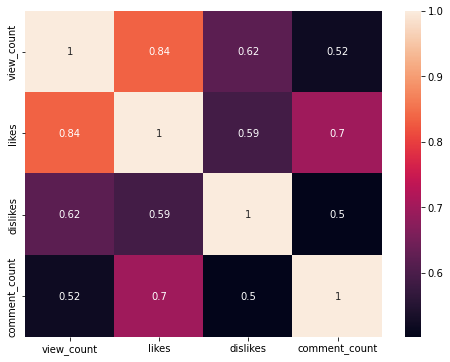

In [8]:
# to help you visualize these correlations, see the plots below
# the lighter the colour the higher the correlation

matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(hm_data, annot=True);

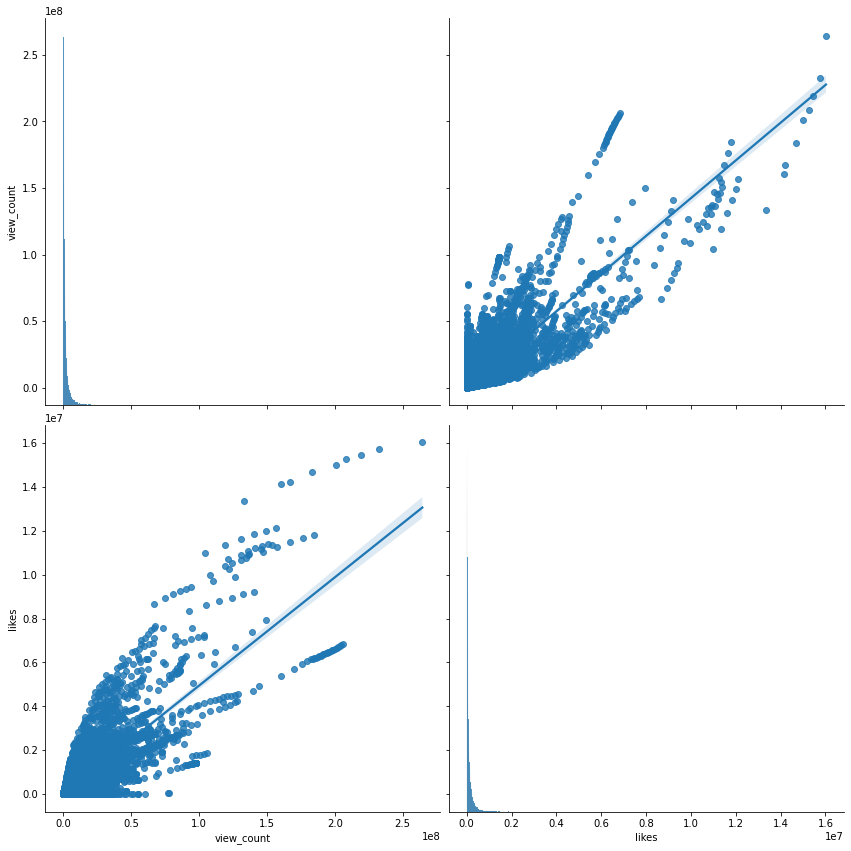

In [9]:
#matplotlib.pyplot.figure(figsize=(12,12))
sns.pairplot(us_yt[['view_count', 'likes']], kind='reg',height=6);

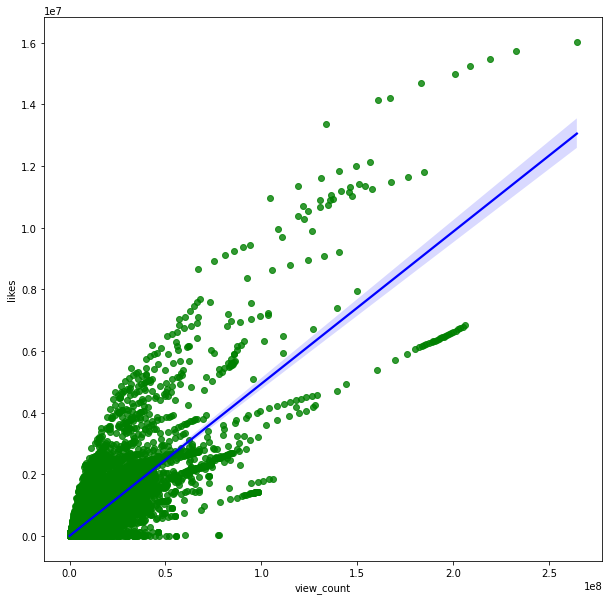

In [10]:
#to get a closer look at the scatterplot for likes/views
matplotlib.pyplot.figure(figsize=(10,10))
sns.regplot(x=us_yt['view_count'], y=us_yt['likes'],scatter_kws={"color": "green"}, line_kws={"color": "blue"});

# <a id="part-2"></a>
## World Data

# Now that we see the correlation coefficient for the US data, let's now see how much these trends stay the same in other countries.

In [11]:
#For these datasets we will use a subset of the columns, certain columns have characters that
#the dataframe can't currently handle and since those columns don't contain meaningful data for
#this use case I'm electing to simply drop them 
col_list = ['video_id', 'view_count', 'likes', 'dislikes', 'comment_count']

us_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/US_youtube_trending_data.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/CA_youtube_trending_data.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/DE_youtube_trending_data.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/FR_youtube_trending_data.csv', usecols=col_list) #France
gb_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/GB_youtube_trending_data.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/IN_youtube_trending_data.csv', usecols=col_list) #India
jp_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/JP_youtube_trending_data.csv', usecols=col_list) #Japan
kr_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/KR_youtube_trending_data.csv', usecols=col_list) #South Korea
mx_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/MX_youtube_trending_data.csv', usecols=col_list) #Mexico
ru_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/RU_youtube_trending_data.csv', usecols=col_list) #Russia

In [12]:
df_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt, jp_yt, kr_yt, mx_yt, ru_yt]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']


In [13]:
df_list[0]

video_id  view_count   likes  dislikes  comment_count
0       3C66w5Z0ixs     1514614  156908      5855          35313
1       M9Pmf9AB4Mo     2381688  146739      2794          16549
2       J78aPJ3VyNs     2038853  353787      2628          40221
3       kXLn3HkpjaA      496771   23251      1856           7647
4       VIUo6yapDbc     1123889   45802       964           2196
...             ...         ...     ...       ...            ...
141785  ZD0doCSkBY8    14011452  380391         0          16150
141786  nBDHqquK_8k      820915   17734         0           2665
141787  E6Z4xjEjFcs     1660353  250817         0          12225
141788  GN_IwBptKi4     3489886   87723         0           3838
141789  Ty6OJFSLwVs      456140   26624         0           2201

[141790 rows x 5 columns]

In [14]:
views_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])
likes_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])

display(views_df, likes_df)

Empty DataFrame
Columns: [view_count, likes, dislikes, comment_count]
Index: []

Empty DataFrame
Columns: [view_count, likes, dislikes, comment_count]
Index: []

In [15]:
count = 0
while count != 10:
    print(df_name_list[count])
    current_df = df_list[count]
    _x = current_df[correlation_list].corr()
    display(_x)
    views_df.loc[count] = _x.loc['view_count']
    likes_df.loc[count] = _x.loc['likes']
    count += 1
# Hid output to keep the size of the notebook down, feel free to unhide it to see more of the data

United States


view_count     likes  dislikes  comment_count
view_count       1.000000  0.836036  0.620015       0.519318
likes            0.836036  1.000000  0.589439       0.698360
dislikes         0.620015  0.589439  1.000000       0.501609
comment_count    0.519318  0.698360  0.501609       1.000000

Canada


view_count     likes  dislikes  comment_count
view_count       1.000000  0.827805  0.660427       0.510413
likes            0.827805  1.000000  0.586654       0.693405
dislikes         0.660427  0.586654  1.000000       0.483016
comment_count    0.510413  0.693405  0.483016       1.000000

Germany


view_count     likes  dislikes  comment_count
view_count       1.000000  0.838260  0.619529       0.509273
likes            0.838260  1.000000  0.560582       0.694709
dislikes         0.619529  0.560582  1.000000       0.486339
comment_count    0.509273  0.694709  0.486339       1.000000

France


view_count     likes  dislikes  comment_count
view_count       1.000000  0.874053  0.647131       0.729025
likes            0.874053  1.000000  0.616007       0.801554
dislikes         0.647131  0.616007  1.000000       0.610445
comment_count    0.729025  0.801554  0.610445       1.000000

Great Brittain


view_count     likes  dislikes  comment_count
view_count       1.000000  0.825301  0.628877       0.516027
likes            0.825301  1.000000  0.557840       0.698964
dislikes         0.628877  0.557840  1.000000       0.471708
comment_count    0.516027  0.698964  0.471708       1.000000

India


view_count     likes  dislikes  comment_count
view_count       1.000000  0.809521  0.136891       0.475845
likes            0.809521  1.000000  0.080608       0.626581
dislikes         0.136891  0.080608  1.000000       0.160338
comment_count    0.475845  0.626581  0.160338       1.000000

Japan


view_count     likes  dislikes  comment_count
view_count       1.000000  0.895050  0.634229       0.803755
likes            0.895050  1.000000  0.621316       0.831417
dislikes         0.634229  0.621316  1.000000       0.618272
comment_count    0.803755  0.831417  0.618272       1.000000

South Korea


view_count     likes  dislikes  comment_count
view_count       1.000000  0.882202  0.623595       0.791430
likes            0.882202  1.000000  0.625079       0.820307
dislikes         0.623595  0.625079  1.000000       0.628837
comment_count    0.791430  0.820307  0.628837       1.000000

Mexico


view_count     likes  dislikes  comment_count
view_count       1.000000  0.846998  0.594101       0.703178
likes            0.846998  1.000000  0.571566       0.761646
dislikes         0.594101  0.571566  1.000000       0.553964
comment_count    0.703178  0.761646  0.553964       1.000000

Russia


view_count     likes  dislikes  comment_count
view_count       1.000000  0.855967  0.531345       0.650975
likes            0.855967  1.000000  0.518245       0.767858
dislikes         0.531345  0.518245  1.000000       0.495649
comment_count    0.650975  0.767858  0.495649       1.000000

In [16]:
views_df

view_count     likes  dislikes  comment_count
0         1.0  0.836036  0.620015       0.519318
1         1.0  0.827805  0.660427       0.510413
2         1.0  0.838260  0.619529       0.509273
3         1.0  0.874053  0.647131       0.729025
4         1.0  0.825301  0.628877       0.516027
5         1.0  0.809521  0.136891       0.475845
6         1.0  0.895050  0.634229       0.803755
7         1.0  0.882202  0.623595       0.791430
8         1.0  0.846998  0.594101       0.703178
9         1.0  0.855967  0.531345       0.650975

In [17]:
likes_df

view_count  likes  dislikes  comment_count
0    0.836036    1.0  0.589439       0.698360
1    0.827805    1.0  0.586654       0.693405
2    0.838260    1.0  0.560582       0.694709
3    0.874053    1.0  0.616007       0.801554
4    0.825301    1.0  0.557840       0.698964
5    0.809521    1.0  0.080608       0.626581
6    0.895050    1.0  0.621316       0.831417
7    0.882202    1.0  0.625079       0.820307
8    0.846998    1.0  0.571566       0.761646
9    0.855967    1.0  0.518245       0.767858

In [18]:
views_df = views_df.drop(axis=1, labels='view_count') #remove redundant column
views_df.index = df_name_list
display(views_df.style.background_gradient()) ## MasterData frame with all the correlation coefficients in relation to views 

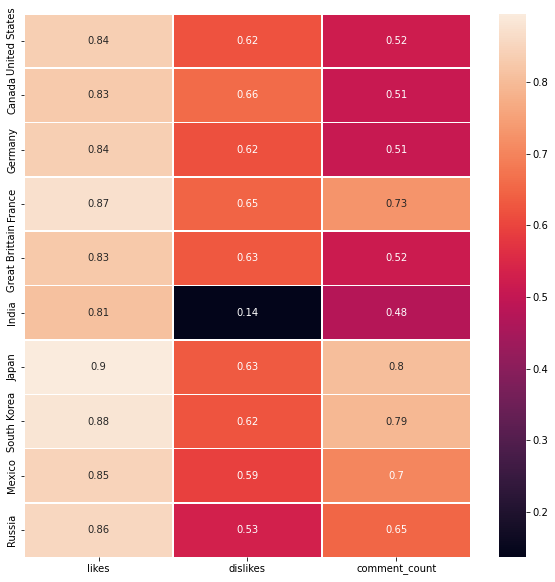

In [19]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(views_df, annot=True, linewidths=.5);

In [20]:
likes_df = likes_df.drop(axis=1, labels='likes') #remove redundant column
likes_df.index = df_name_list
display(likes_df.style.background_gradient()) ## Master Data frame with all the corrolation coefficients in relation to likes

In [21]:
dislikes_df = likes_df.drop(axis=1, labels='dislikes') #remove redundant column
dislikes_df.index = df_name_list
display(dislikes_df.style.background_gradient()) ## Master Data frame with all the corrolation coefficients in relation to likes

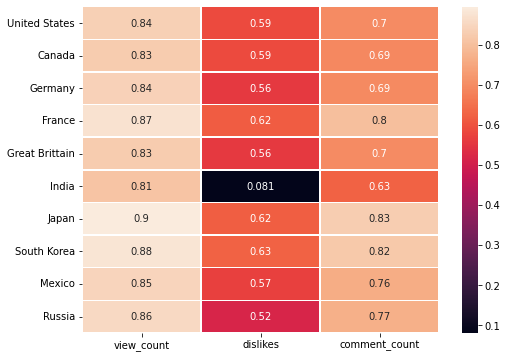

In [22]:
matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(likes_df, annot=True, linewidths=.5);

We can see that there is a high correlation between the number of likes on a video and the number of views. Also an interesting note: likes and comment count has an incredibly high correlation in Japan, Japan also has a weirdly high correlation between dislikes, likes and views (one could also rephrase this to a high correlation between reactions and views). There are other interesting little tidbits in the data.

(obligatory correlation =/= causation speil)Without seeing this data in timelapse one couldn't determine if a particular variable is the cause of the other. For instance: are videos that are watched frequently more likely to be liked by a viewer, or does a video receiving a large number of likes cause it to be recommended frequently. Or perhaps neither is the cause of the other and perhaps some confounding variable is the cause of both of these. 

In [23]:
Master_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count', 'country'])
display(Master_df)

Empty DataFrame
Columns: [view_count, likes, dislikes, comment_count, country]
Index: []

In [24]:
#now to create a master dataframe with all the datapoints in it
count = 0
entries = 0
while count != 10:
    current_df = df_list[count]
    entries = entries + len(current_df)
    country_name = df_name_list[count]
    current_df['country'] = country_name
    # current_df
    Master_df = pd.merge(Master_df, current_df, how='outer')
    count += 1
print(entries)

1405318


In [25]:
print(entries) 
print(len(Master_df)) #comparing the total number of entries to make sure I didn't lose any data points 
display(Master_df.sample(10))


1405318
1405318


video_id  view_count   likes  dislikes  comment_count  \
576236   6AYggGaMRTQ      794000   17626       490            779   
560543   Prq99rwQjTI      496659   35522         0            465   
747010   pYgzNiYqlIU      966796   86032      1124           1984   
1343655  pxGtI7AD5pI      161276    3823        51            139   
1271436  Xo8VJj2X-No       75252   13262       251            243   
215964   gHcfWy4BWIk      868767   41180       795           2812   
1305973  NXKvqrRluRA       24539    3482       114            325   
359176   YbgNFGigHGk      598448   42610       515            959   
398761   vUzugSzmrw8      109344   11672         0           1625   
693154   aPmw2HZvU3o     3564898  404560         0           6557   

                country  
576236   Great Brittain  
560543           France  
747010            India  
1343655          Russia  
1271436          Russia  
215964           Canada  
1305973          Russia  
359176          Germany  
398761          Germany  
693154   Great Brittain

In [26]:
Master_df[correlation_list].corr().style.background_gradient()



As you can see below the trend below seems to follow for each country in the datasets

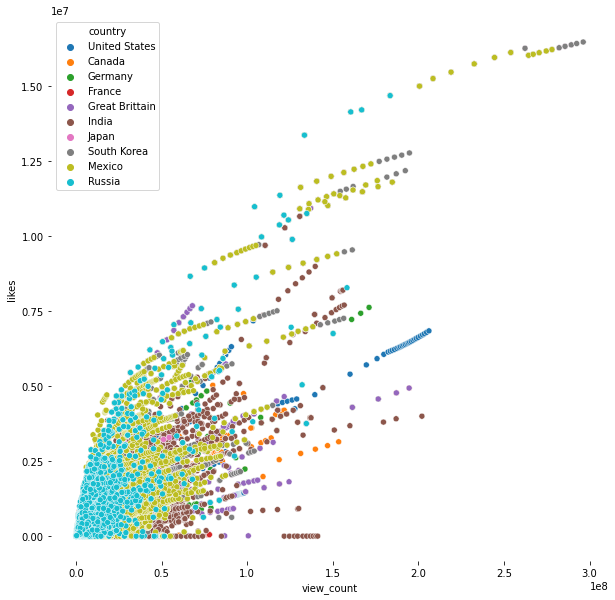

In [27]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["view_count"], y=Master_df["likes"], hue=Master_df["country"])
sns.despine(bottom=True, left=True);

# SHOWING MOST COMMON WORDS USED IN TITLE FOR EACH COUTRY BY WORD CLOUD

In [28]:
col_list = ["title"]

us_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/US_youtube_trending_data.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/CA_youtube_trending_data.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/DE_youtube_trending_data.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/FR_youtube_trending_data.csv', usecols=col_list) #France
gb_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/GB_youtube_trending_data.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/IN_youtube_trending_data.csv', usecols=col_list) #India
jp_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/JP_youtube_trending_data.csv', usecols=col_list) #Japan
kr_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/KR_youtube_trending_data.csv', usecols=col_list) #South Korea
mx_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/MX_youtube_trending_data.csv', usecols=col_list) #Mexico
ru_yt = pd.read_csv('/content/drive/MyDrive/Youtube Analysis/RU_youtube_trending_data.csv', usecols=col_list) #Russia

In [29]:
df_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt, jp_yt, kr_yt, mx_yt, ru_yt]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']


In [30]:

#for a in df_list:
def wordcld(a,j):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    title_words = list(a["title"].apply(lambda x: x.split()))
    title_words = [x for y in title_words for x in y]
    #print(df_name_list[j])
    wc = WordCloud(width=1200, height=500, 
                                collocations=False, background_color="white", 
                                colormap="tab20b").generate(" ".join(title_words))
    plt.figure(figsize=(15,10))
    plt.imshow(wc, interpolation='bilinear')
    #plt.axis("off")
    plt.ylabel(df_name_list[j])

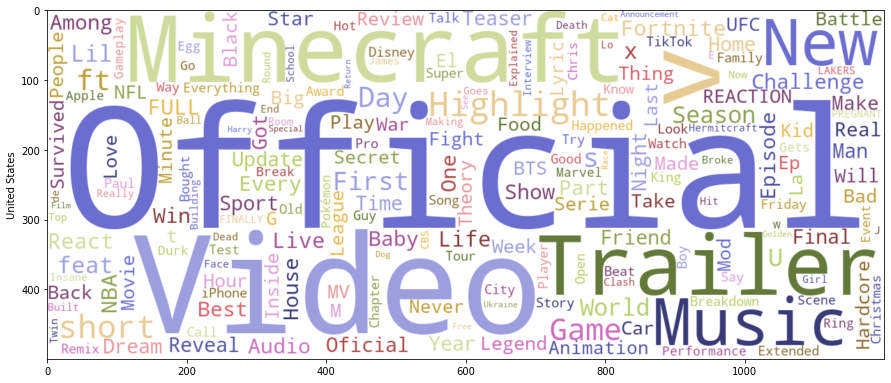

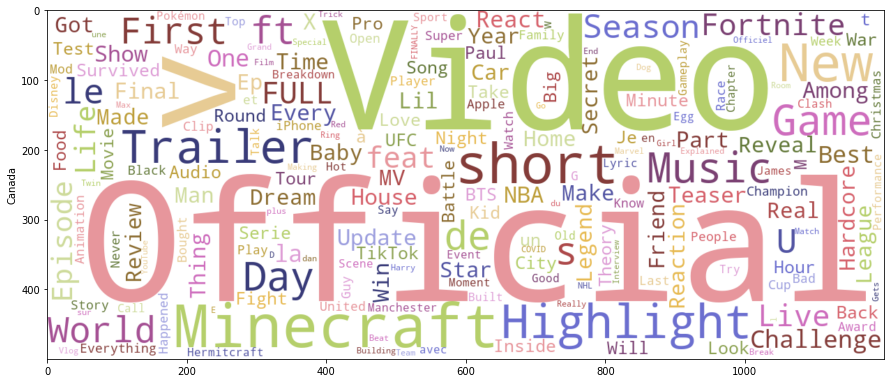

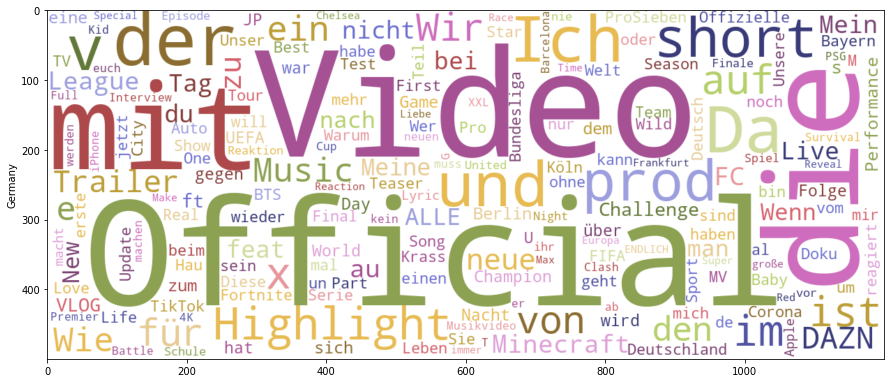

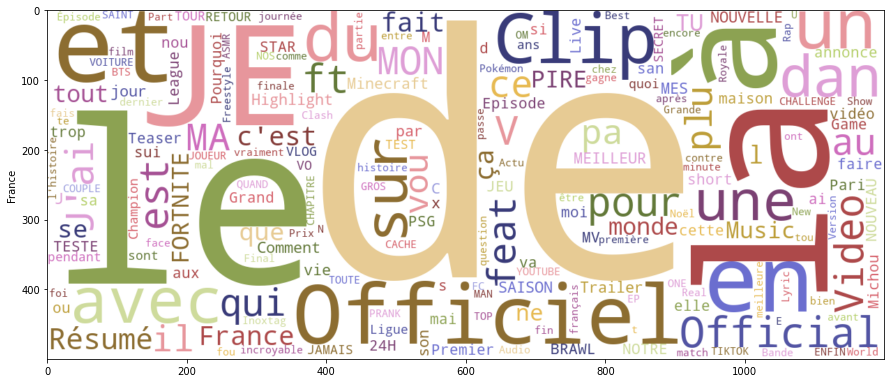

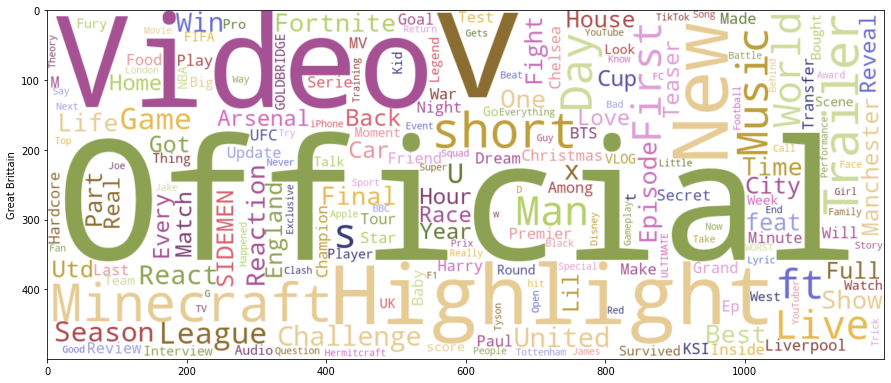

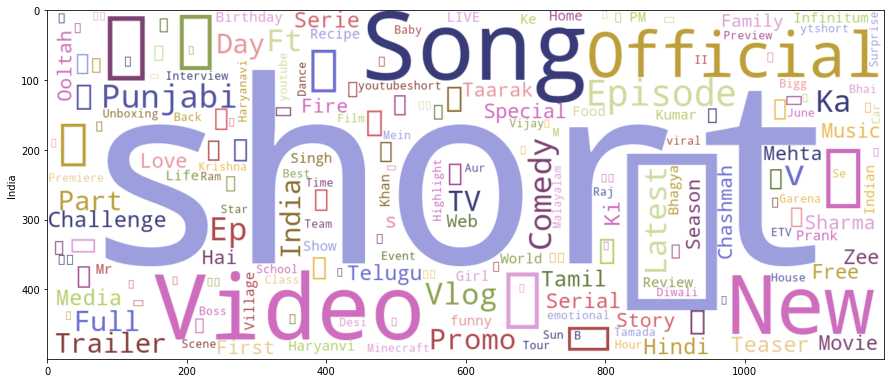

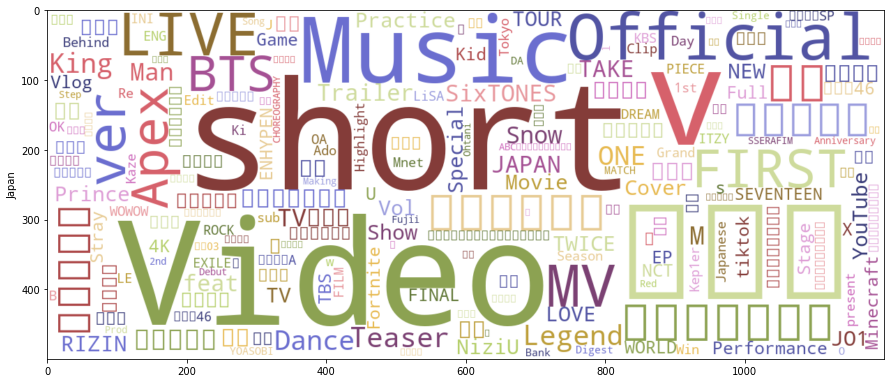

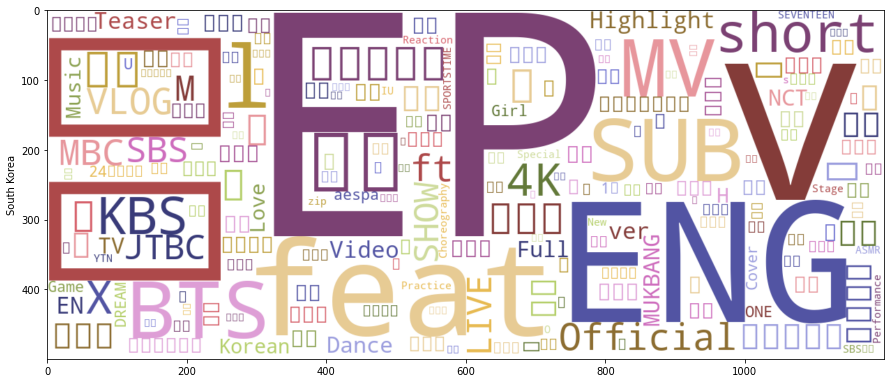

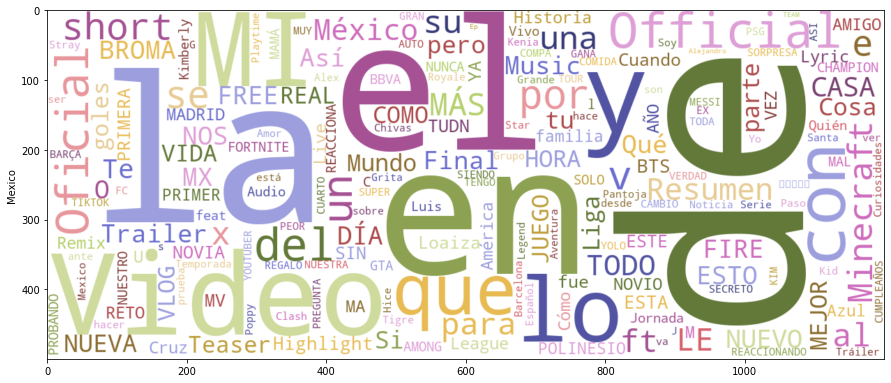

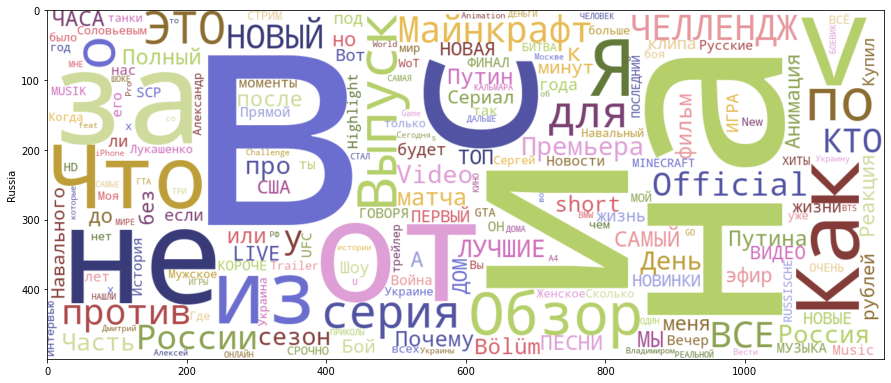

In [31]:
j=0
while j<len(df_list):
    #print(df_name_list[j])
    wordcld(df_list[j],j)
    j=j+1
    

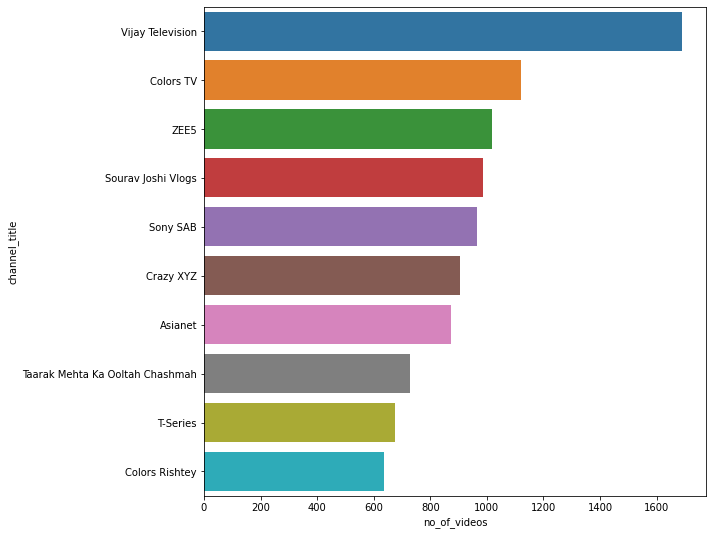

In [32]:
ind= pd.read_csv('/content/drive/MyDrive/Youtube Analysis/IN_youtube_trending_data.csv')
l=ind.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':ind.channelTitle.value_counts()[:10]})
video_count.index=[i for i in range(1,11)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)

In [33]:
ind[ind["view_count"].idxmax():ind["view_count"].idxmax()+1]

video_id                             title           publishedAt  \
52057  WMweEpGlu_U  BTS (방탄소년단) 'Butter' Official MV  2021-05-21T03:46:13Z   

                      channelId channelTitle  categoryId  \
52057  UC3IZKseVpdzPSBaWxBxundA  HYBE LABELS          10   

              trending_date                             tags  view_count  \
52057  2021-05-30T00:00:00Z  BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   264407389   

          likes  dislikes  comment_count  \
52057  16021542    150990        6738565   

                                       thumbnail_link  comments_disabled  \
52057  https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   

       ratings_disabled                                        description  
52057             False  BTS (방탄소년단) 'Butter' Official MV Credits: Dire...

          channel_title  no_of_videos
1                   NBA           852
2                   NFL           830
3          SSSniperWolf           577
4        MrBeast Gaming           467
5               SSundee           451
6                  ESPN           415
7   Saturday Night Live           397
8               MrBeast           397
9          Dude Perfect           397
10   The Game Theorists           356


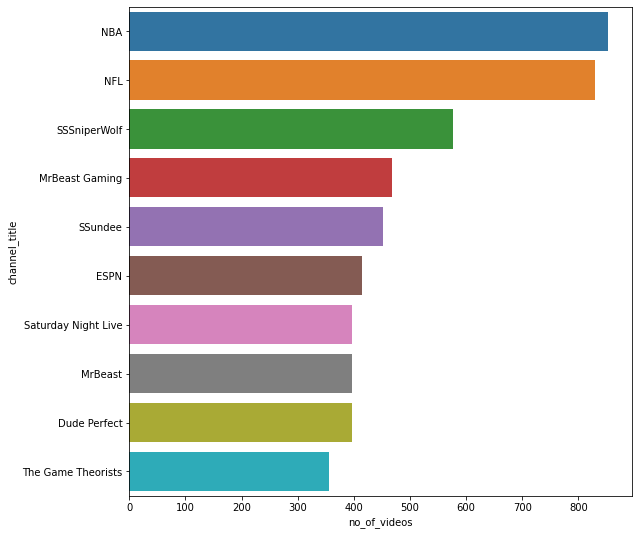

In [34]:
us= pd.read_csv('/content/drive/MyDrive/Youtube Analysis/US_youtube_trending_data.csv')
l=us.channelTitle.value_counts()[:10].index
video_count = pd.DataFrame({'channel_title':l,'no_of_videos':us.channelTitle.value_counts()[:10]})
video_count.index=[i for i in range(1,11)]
print(video_count)
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(y="channel_title",x="no_of_videos",data = video_count)

In [35]:
us['views_mil'] = us['view_count'] / 1000000
l=us[['channelTitle','views_mil']].groupby('channelTitle')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10].index
f=pd.DataFrame(us[['channelTitle','views_mil']].groupby('channelTitle')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10])
f["channelTitle"]=l
f.index=[i for i in range(1,11)]
f.columns
f=f[[('channelTitle',      ''),(    'views_mil',  'mean'),(    'views_mil', 'count')]]
cm = sns.light_palette("green", as_cmap=True)

f.style.background_gradient(cmap=cm).set_precision(2).highlight_null('red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


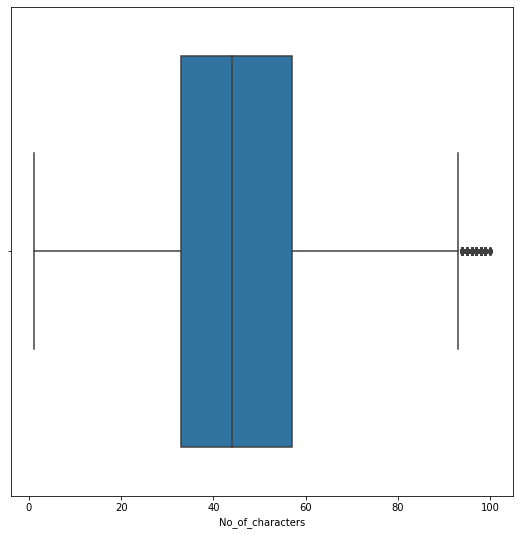

In [36]:
us= pd.read_csv('/content/drive/MyDrive/Youtube Analysis/US_youtube_trending_data.csv')
import re
import nltk
s=pd.Series(us["title"])
l=[]
for i in range(0,len(s)):
        s[i]= re.sub('[^a-zA-Z]', ' ',s[i])
        s[i]=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",s[i])
        s[i]=re.sub("(\\d|\\W)+"," ",s[i])
        l.append(len(s[i]))
matplotlib.pyplot.figure(figsize=(9,9))
ax=sns.boxplot(l)
ax.set(xlabel="No_of_characters")
us["filter_title"]=s
us["title_length"]=pd.Series(l)

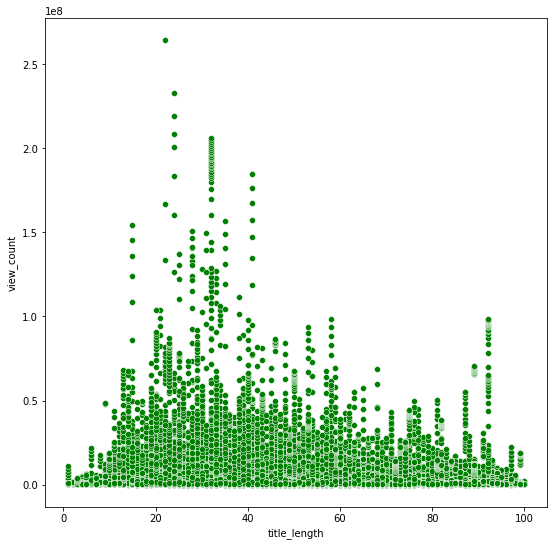

In [37]:
matplotlib.pyplot.figure(figsize=(9,9))
ax=sns.scatterplot(data=us,y="view_count",x="title_length",color="green")

In [38]:
us["trending_year"]=pd.DatetimeIndex(us['trending_date']).year

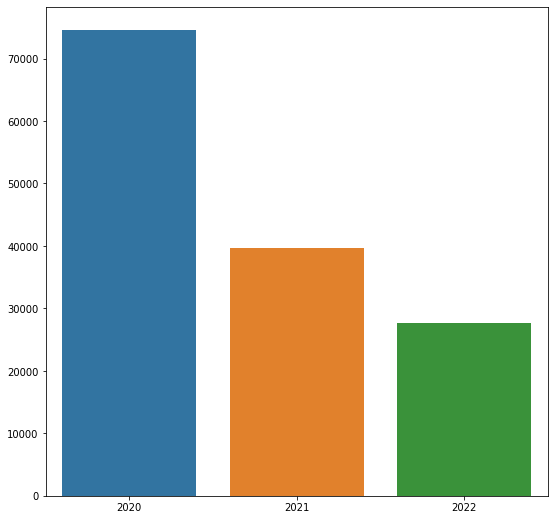

In [39]:
#us["trending_year"]= us["trending_date"].apply(lambda x: '20' + x[:2])
m=list(us["trending_year"].value_counts())
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=list(us["trending_year"].unique()),y=m)

In [40]:
us["trendingDate"]=pd.DatetimeIndex(us['trending_date']).date

In [41]:
print(us["trendingDate"][:5])
us["trendingDate"]=pd.to_datetime(us["trendingDate"],format = "%Y.%m.%d")
#us["trending_date"]=pd.to_datetime(us["trending_date]"]).dt.date
us["publish_date"]=pd.to_datetime(us["publishedAt"]).dt.date
us["publish_clock"]=pd.to_datetime(us["publishedAt"]).dt.hour
print(us["publish_clock"][:5])
us["publish_date"]=pd.to_datetime(us["publish_date"],format = "%Y/%m/%d")
l=[]
for i in us["publish_date"]:
    l.append(i.day_name())
us["publish_day"]= l

0    2020-08-12
1    2020-08-12
2    2020-08-12
3    2020-08-12
4    2020-08-12
Name: trendingDate, dtype: object
0    19
1    17
2    16
3    16
4    15
Name: publish_clock, dtype: int64


Index(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Sunday', 'Thursday',
       'Saturday'],
      dtype='object')


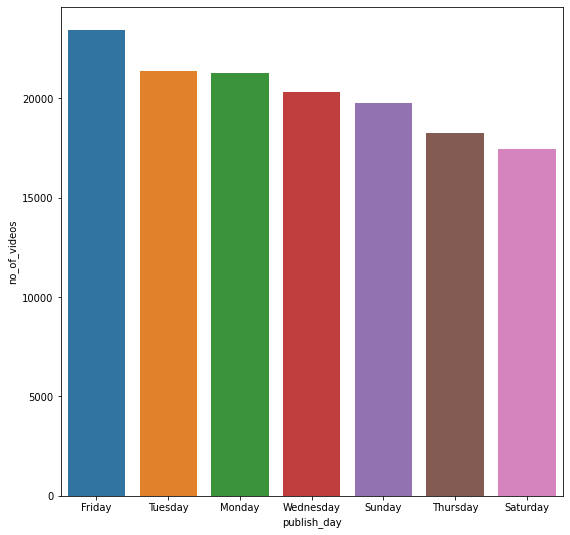

In [42]:
x=us["publish_day"].value_counts()
print(x.index)
h=pd.DataFrame({"publish_day":x.index,"no_of_videos":x})
h.index=[i for i in range(0,7)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="publish_day",y="no_of_videos",data=h)

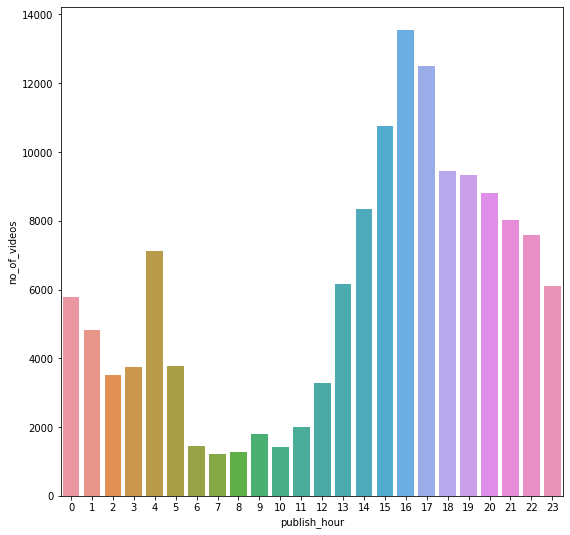

In [43]:
c=us["publish_clock"].value_counts()
h=pd.DataFrame({"publish_hour":c.index,"no_of_videos":c})
h.index=[i for i in range(0,24)]
h=h.sort_values("publish_hour")
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="publish_hour",y="no_of_videos",data=h)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 35.0)]

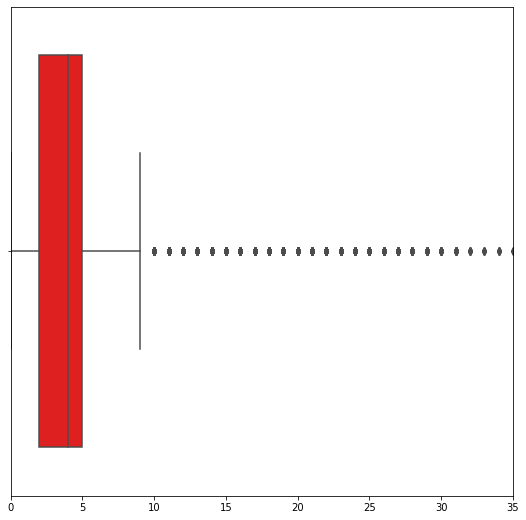

In [44]:
us["time_diff"]=us["trendingDate"]-us["publish_date"]
l=list(us["time_diff"].dt.days)
matplotlib.pyplot.figure(figsize=(9,9))
g=sns.boxplot(l,color="red")
g.set(xlim=(0,35))

In [45]:
with open("/content/drive/MyDrive/Youtube Analysis/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
us['category_name'] = us['categoryId'].map(cat_dict)

In [46]:
with open("/content/drive/MyDrive/Youtube Analysis/IN_category_id.json") as g:
    categories = json.load(g)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
ind['category_name'] = ind['categoryId'].map(cat_dict)

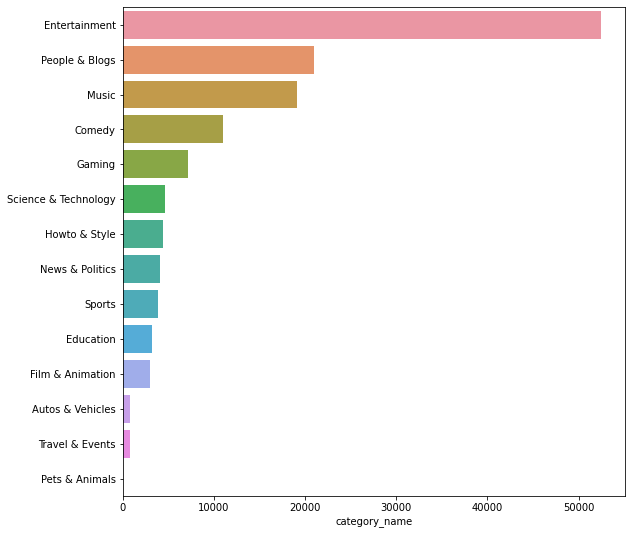

In [47]:
i=ind["category_name"].value_counts().index
m=ind["category_name"].value_counts()
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=m,y=i)

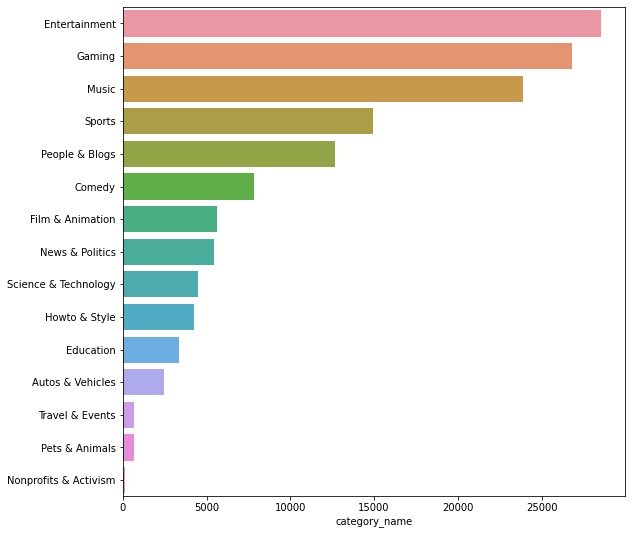

In [48]:
i=us["category_name"].value_counts().index
m=us["category_name"].value_counts()
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=m,y=i)

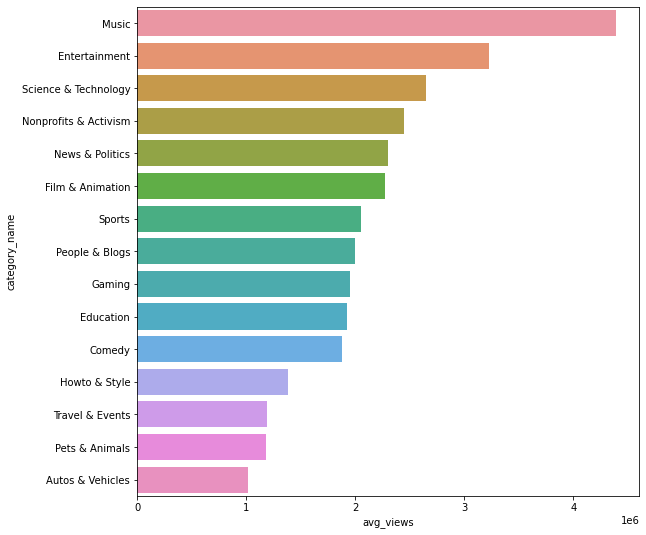

In [49]:
l=us.groupby("category_name").sum()["view_count"]/us["category_name"].value_counts()
s=pd.DataFrame({"category_name":l.index,"avg_views":l})
s=s.sort_values("avg_views",ascending=False)
s.index=[i for i in range(0,15)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="avg_views",y="category_name",data=s)

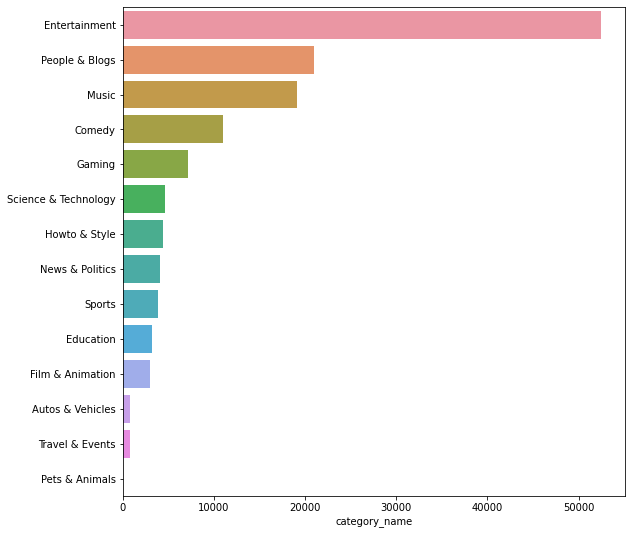

In [50]:
i=ind["category_name"].value_counts().index
m=ind["category_name"].value_counts()
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x=m,y=i)

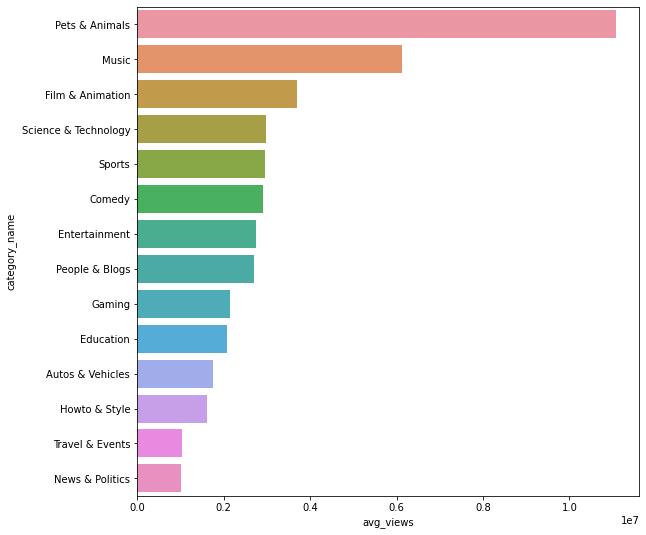

In [51]:
l=ind.groupby("category_name").sum()["view_count"]/ind["category_name"].value_counts()
s=pd.DataFrame({"category_name":l.index,"avg_views":l})
s=s.sort_values("avg_views",ascending=False)
s.index=[i for i in range(0,14)]
matplotlib.pyplot.figure(figsize=(9,9))
sns.barplot(x="avg_views",y="category_name",data=s)